In [1]:
import charset_normalizer
with open("Top_200_Movies_Dataset_2023(Cleaned).csv", 'rb') as rawdata:
    result = charset_normalizer.detect(rawdata.read(10000))

# check what the character encoding might be
print(result)

{'encoding': 'UTF-8-SIG', 'language': 'English', 'confidence': 1.0}


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("Top_200_Movies_Dataset_2023(Cleaned).csv",encoding="UTF-8-SIG")

In [4]:
df.shape

(200, 6)

In [5]:
df.describe()

,Rank
count,200.000000
mean,100.500000
std,57.879185
min,1.000000
25%,50.750000
50%,100.500000
75%,150.250000
max,200.000000


In [6]:
df.head(10)

,Rank,Title,Theaters,Total Gross,Release Date,Distributor
0,1,Barbie,"4,337","$594,254,460",2023-07-21 00:00:00,Warner Bros.
1,2,The Super Mario Bros. Movie,"4,371","$574,759,600",2023-04-05 00:00:00,Universal Pictures
2,3,Spider-Man: Across the Spider-Verse,"4,332","$381,178,195",2023-06-02 00:00:00,Columbia Pictures
3,4,Guardians of the Galaxy Vol. 3,"4,450","$358,995,815",2023-05-05 00:00:00,Walt Disney Studios Motion Pictures
4,5,Oppenheimer,"3,761","$300,144,670",2023-07-21 00:00:00,Universal Pictures
5,6,The Little Mermaid,"4,320","$297,895,447",2023-05-26 00:00:00,Walt Disney Studios Motion Pictures
6,7,Avatar: The Way of Water,"4,340","$684,075,767",2023-12-16 00:00:00,20th Century Studios
7,8,Ant-Man and the Wasp: Quantumania,"4,345","$214,504,909",2023-02-17 00:00:00,Walt Disney Studios Motion Pictures
8,9,John Wick: Chapter 4,"3,855","$187,131,806",2023-03-24 00:00:00,Lionsgate
9,10,Sound of Freedom,"3,411","$180,587,629",2023-07-04 00:00:00,Angel Studios


In [7]:
df.dtypes

Rank             int64
Title           object
Theaters        object
Total Gross     object
Release Date    object
Distributor     object
dtype: object

In [8]:
#converting object types into numeric for easy operation
df['Total Gross'] = df['Total Gross'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)
# df.dtypes
df['Theaters'] = df['Theaters'].str.replace('[^\d]', '', regex=True)
# Convert the cleaned column to integers
df['Theaters'] = pd.to_numeric(df['Theaters'], errors='coerce', downcast='integer')
df.dtypes

Rank              int64
Title            object
Theaters        float64
Total Gross     float64
Release Date     object
Distributor      object
dtype: object

In [9]:
#top 10 grossing movie of 2023
topGrossing=df.nlargest(10,'Total Gross')
topGrossing


,Rank,Title,Theaters,Total Gross,Release Date,Distributor
6,7,Avatar: The Way of Water,4340.0,684075767.0,2023-12-16 00:00:00,20th Century Studios
0,1,Barbie,4337.0,594254460.0,2023-07-21 00:00:00,Warner Bros.
1,2,The Super Mario Bros. Movie,4371.0,574759600.0,2023-04-05 00:00:00,Universal Pictures
48,49,Black Panther: Wakanda Forever,4396.0,453829060.0,2023-11-11 00:00:00,Walt Disney Studios Motion Pictures
2,3,Spider-Man: Across the Spider-Verse,4332.0,381178195.0,2023-06-02 00:00:00,Columbia Pictures
3,4,Guardians of the Galaxy Vol. 3,4450.0,358995815.0,2023-05-05 00:00:00,Walt Disney Studios Motion Pictures
4,5,Oppenheimer,3761.0,300144670.0,2023-07-21 00:00:00,Universal Pictures
5,6,The Little Mermaid,4320.0,297895447.0,2023-05-26 00:00:00,Walt Disney Studios Motion Pictures
7,8,Ant-Man and the Wasp: Quantumania,4345.0,214504909.0,2023-02-17 00:00:00,Walt Disney Studios Motion Pictures
8,9,John Wick: Chapter 4,3855.0,187131806.0,2023-03-24 00:00:00,Lionsgate


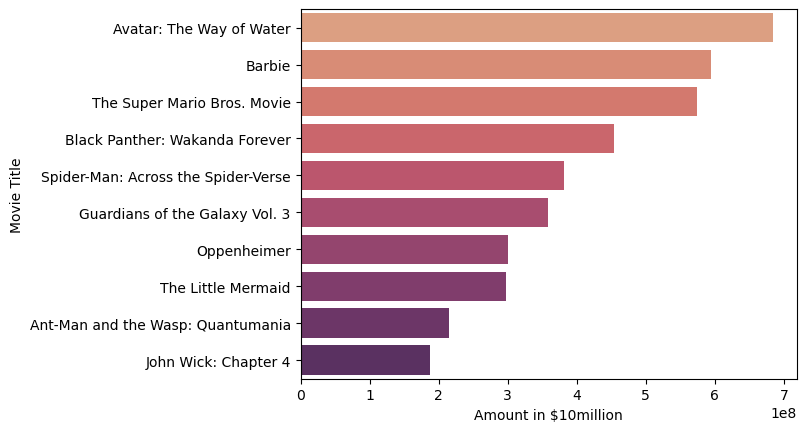

In [10]:
sns.barplot(y='Title',x='Total Gross',data=topGrossing,palette='flare')
# plt.xticks(rotataion=90)
plt.xlabel('Amount in $10million')
plt.ylabel('Movie Title')
plt.show()

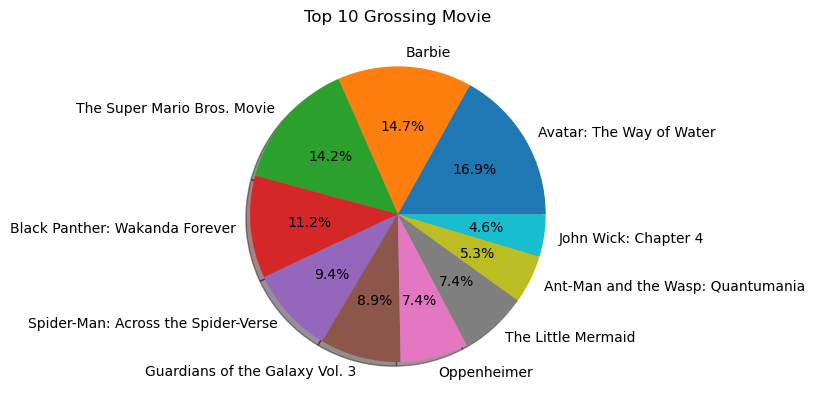

In [11]:
#using barplot
plt.pie(topGrossing['Total Gross'],labels=topGrossing['Title'],autopct='%1.1f%%',startangle=0,shadow=True)
plt.title("Top 10 Grossing Movie")
plt.show()

In [12]:
#movie running on most theaters
most_theatres=df.nlargest(15,'Theaters')
most_theatres

,Rank,Title,Theaters,Total Gross,Release Date,Distributor
10,11,Indiana Jones and the Dial of Destiny,4600.0,174116627.0,2023-06-30 00:00:00,Walt Disney Studios Motion Pictures
3,4,Guardians of the Galaxy Vol. 3,4450.0,358995815.0,2023-05-05 00:00:00,Walt Disney Studios Motion Pictures
48,49,Black Panther: Wakanda Forever,4396.0,453829060.0,2023-11-11 00:00:00,Walt Disney Studios Motion Pictures
1,2,The Super Mario Bros. Movie,4371.0,574759600.0,2023-04-05 00:00:00,Universal Pictures
193,194,"Lyle, Lyle, Crocodile",4350.0,46888441.0,2023-10-07 00:00:00,Sony Pictures Entertainment (SPE)
7,8,Ant-Man and the Wasp: Quantumania,4345.0,214504909.0,2023-02-17 00:00:00,Walt Disney Studios Motion Pictures
6,7,Avatar: The Way of Water,4340.0,684075767.0,2023-12-16 00:00:00,20th Century Studios
0,1,Barbie,4337.0,594254460.0,2023-07-21 00:00:00,Warner Bros.
2,3,Spider-Man: Across the Spider-Verse,4332.0,381178195.0,2023-06-02 00:00:00,Columbia Pictures
11,12,Mission: Impossible - Dead Reckoning Part One,4327.0,168248955.0,2023-07-12 00:00:00,Paramount Pictures


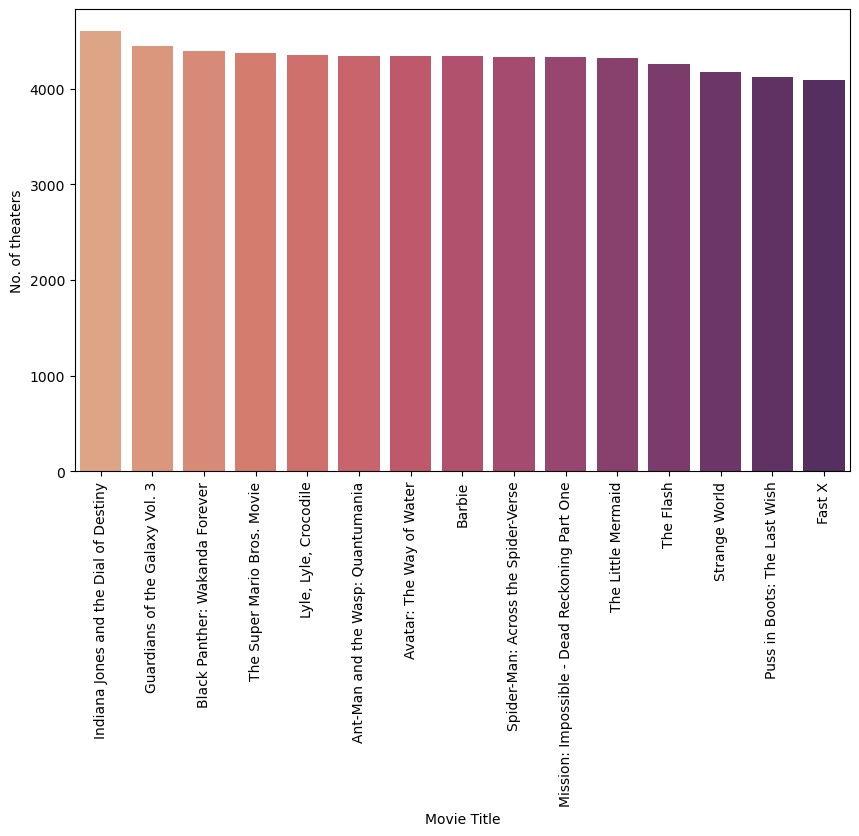

In [13]:
#Movie with most Theatres running
plt.figure(figsize=(10,6))
sns.barplot(x='Title',y='Theaters',data=most_theatres,palette='flare')
plt.xticks(rotation=90)
plt.xlabel('Movie Title')
plt.ylabel('No. of theaters')
plt.show()

In [14]:
df["Distributor"].nunique()

52

In [15]:
#Total gross of individaula distributor
gross_earning_distributor=df.groupby('Distributor').agg({'Total Gross':'sum'})
gross_earning_distributor.reset_index(inplace=True)
gross_earning_distributor

,Distributor,Total Gross
0,'-,7.145653e+07
1,20th Century Studios,6.840758e+08
2,A24,1.631644e+08
3,Angel Studios,1.926717e+08
4,Atlas Distribution Company,4.125500e+05
5,Bleecker Street Media,8.387803e+06
6,Blue Fox Entertainment,6.683040e+05
7,Briarcliff Entertainment,3.057245e+06
8,CMC Pictures,1.721446e+06
9,Capelight Pictures,9.094110e+05


In [16]:
#top grossing Distributor
most_earning_distributor=gross_earning_distributor.nlargest(10,'Total Gross')
most_earning_distributor

,Distributor,Total Gross
48,Walt Disney Studios Motion Pictures,1.798080e+09
44,Universal Pictures,1.517804e+09
49,Warner Bros.,9.875786e+08
28,Paramount Pictures,6.963171e+08
1,20th Century Studios,6.840758e+08
10,Columbia Pictures,4.659578e+08
20,Lionsgate,3.481745e+08
40,Sony Pictures Entertainment (SPE),1.998531e+08
3,Angel Studios,1.926717e+08
43,United Artists Releasing,1.639156e+08


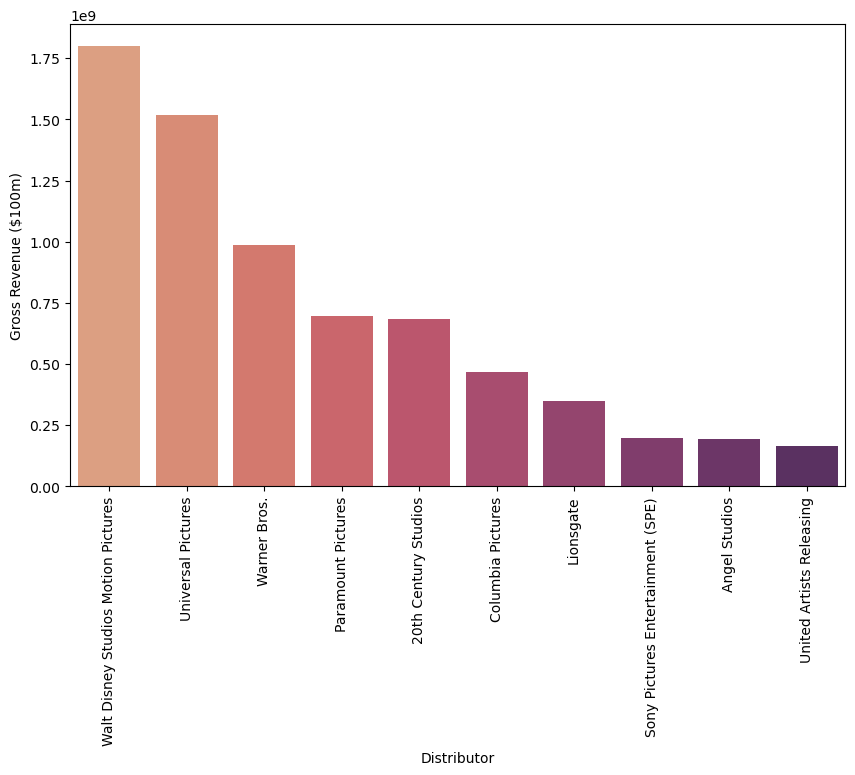

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x='Distributor',y='Total Gross',data=most_earning_distributor,palette='flare')
plt.xticks(rotation=90)
plt.xlabel('Distributor')
plt.ylabel('Gross Revenue ($100m)')
plt.show()

In [23]:
#most occupied theaters
most_occupied_theaters=df.groupby("Distributor").agg({'Theaters':'sum'})
most_occupied_theaters.reset_index(inplace=True)
most_occupied_theaters

,Distributor,Theaters
0,'-,10475.0
1,20th Century Studios,4340.0
2,A24,11111.0
3,Angel Studios,5341.0
4,Atlas Distribution Company,301.0
5,Bleecker Street Media,4358.0
6,Blue Fox Entertainment,704.0
7,Briarcliff Entertainment,2774.0
8,CMC Pictures,0.0
9,Capelight Pictures,41.0


In [24]:
top_occupied_theaters=most_occupied_theaters.nlargest(10,'Theaters')
top_occupied_theaters

,Distributor,Theaters
44,Universal Pictures,43431.0
48,Walt Disney Studios Motion Pictures,38546.0
28,Paramount Pictures,29243.0
49,Warner Bros.,28374.0
40,Sony Pictures Entertainment (SPE),24285.0
20,Lionsgate,23066.0
13,Fathom Events,14711.0
14,Focus Features,12297.0
10,Columbia Pictures,11747.0
2,A24,11111.0


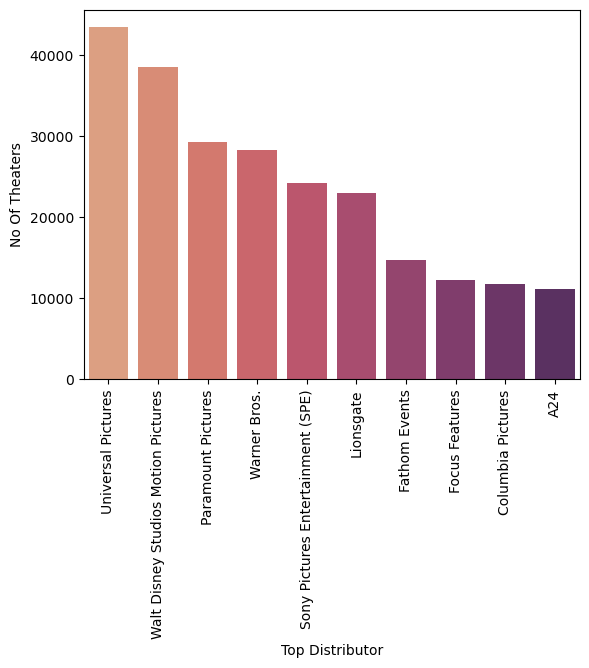

In [37]:
sns.barplot(x='Distributor',y='Theaters',data=top_occupied_theaters,palette='flare')
plt.xticks(rotation=90)
plt.xlabel('Top Distributor')
plt.ylabel('No Of Theaters')
plt.show()

Universal Pictures has released most title in 2023(43431)

In [31]:
df['Release Date']=pd.to_datetime(df['Release Date'])
df.dtypes

Rank                     int64
Title                   object
Theaters               float64
Total Gross            float64
Release Date    datetime64[ns]
Distributor             object
dtype: object

In [32]:
df.head(10)

,Rank,Title,Theaters,Total Gross,Release Date,Distributor
0,1,Barbie,4337.0,594254460.0,2023-07-21,Warner Bros.
1,2,The Super Mario Bros. Movie,4371.0,574759600.0,2023-04-05,Universal Pictures
2,3,Spider-Man: Across the Spider-Verse,4332.0,381178195.0,2023-06-02,Columbia Pictures
3,4,Guardians of the Galaxy Vol. 3,4450.0,358995815.0,2023-05-05,Walt Disney Studios Motion Pictures
4,5,Oppenheimer,3761.0,300144670.0,2023-07-21,Universal Pictures
5,6,The Little Mermaid,4320.0,297895447.0,2023-05-26,Walt Disney Studios Motion Pictures
6,7,Avatar: The Way of Water,4340.0,684075767.0,2023-12-16,20th Century Studios
7,8,Ant-Man and the Wasp: Quantumania,4345.0,214504909.0,2023-02-17,Walt Disney Studios Motion Pictures
8,9,John Wick: Chapter 4,3855.0,187131806.0,2023-03-24,Lionsgate
9,10,Sound of Freedom,3411.0,180587629.0,2023-07-04,Angel Studios


In [33]:
df['Month']=df['Release Date'].dt.month
df.head(5)

,Rank,Title,Theaters,Total Gross,Release Date,Distributor,Month
0,1,Barbie,4337.0,594254460.0,2023-07-21,Warner Bros.,7
1,2,The Super Mario Bros. Movie,4371.0,574759600.0,2023-04-05,Universal Pictures,4
2,3,Spider-Man: Across the Spider-Verse,4332.0,381178195.0,2023-06-02,Columbia Pictures,6
3,4,Guardians of the Galaxy Vol. 3,4450.0,358995815.0,2023-05-05,Walt Disney Studios Motion Pictures,5
4,5,Oppenheimer,3761.0,300144670.0,2023-07-21,Universal Pictures,7


In [34]:
#Month with most released movie
movie_count = df['Month'].value_counts().rename_axis('Month').reset_index(name="Count")
movie_count

,Month,Count
0,4,30
1,3,26
2,2,23
3,5,22
4,1,22
5,7,19
6,8,18
7,6,15
8,12,13
9,11,7


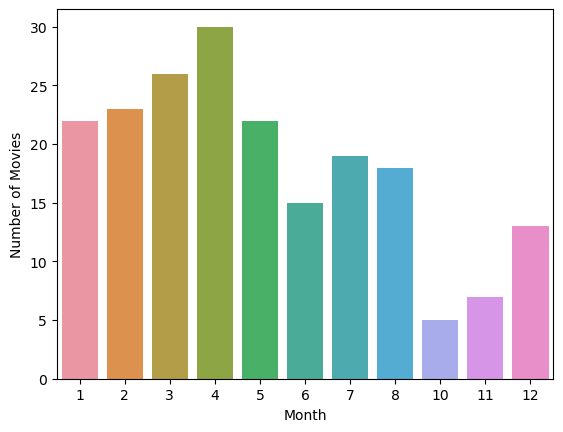

In [36]:
sns.barplot(x='Month',y='Count',data=movie_count)
plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.show()

In month 4(April) most number movie was released(30)

In [40]:
#Month with most earned gross
month_gross_earned=df.groupby('Month').agg({'Total Gross':'sum'})
month_gross_earned.reset_index(inplace=True)
month_gross_earned

,Month,Total Gross
0,1,2.122539e+08
1,2,4.843676e+08
2,3,7.738318e+08
3,4,8.380153e+08
4,5,8.715074e+08
5,6,1.139855e+09
6,7,1.452487e+09
7,8,2.852546e+08
8,10,7.051124e+07
9,11,5.697289e+08


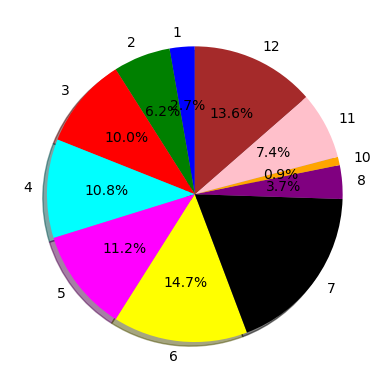

In [55]:
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'orange', 'pink', 'brown', 'lime']
plt.pie(month_gross_earned['Total Gross'],labels=month_gross_earned['Month'],autopct='%1.1f%%',startangle=90,shadow=True,colors=colors)
# plt.title("Top 10 Grossing Movie")
plt.show()

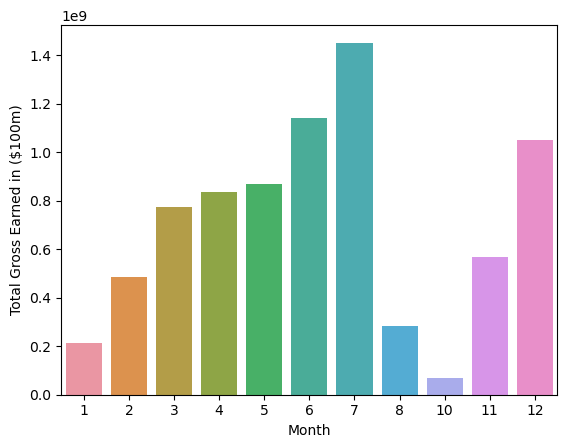

In [47]:
sns.barplot(x='Month',y='Total Gross',data=month_gross_earned)
plt.xlabel('Month')
plt.ylabel('Total Gross Earned in ($100m)')
plt.show()